In [1]:
%run ../scripts/notebook_settings.py
import sgkit as sg
import xarray as xr
import glob

Example workflow to load in the respective individuals and generate base statistics on them.

I will use the Gorilla_individuals.txt for sex determination and Gorilla_regions_and_batches.txt to determine sex chromosome. Restrict analysis to contigs longer than 1Mb.

In [2]:
metadata_path = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024_metadata/"
metadata_df = pd.read_csv(metadata_path+"Gorilla_individuals.txt", sep="\t")
metadata_df["SEX_I"] = [0 if x == "F" else 1 for x in metadata_df.GENETIC_SEX]

In [3]:
metadata_df

,BIOSAMPLE_ID,PDGP_ID,GVCF_ID,SRA_SAMPLE_ID,BIOPROJECT_ID,BAM_FOLDER,GVCF_FOLDER,REFERENCE_FOLDER,GENUS,SPECIES,SUBSPECIES,REPORTED_SEX,GENETIC_SEX,AVG_COVERAGE_A,PROP_COVERED_A,AVG_COVERAGE_X,PROP_COVERED_X,AVG_COVERAGE_Y,PROP_COVERED_Y,SEX_I
0,SAMEA2697037,SAMEA2697037,SAMEA2697037,ERS525616,PRJEB3220,Gorilla_beringei_beringei,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,beringei,Unknown,F,26.505,0.972,24.672,0.991,15.623,0.392,0
1,SAMEA2697038,SAMEA2697038,SAMEA2697038,ERS525617,PRJEB3220,Gorilla_beringei_beringei,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,beringei,Unknown,F,22.825,0.955,20.789,0.981,15.600,0.302,0
2,SAMEA2697039,SAMEA2697039,SAMEA2697039,ERS525618,PRJEB3220,Gorilla_beringei_beringei,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,beringei,Unknown,F,26.797,0.965,21.427,0.985,22.984,0.326,0
3,SAMEA112772595,SAMEA112772595,SAMEA112772595,ERS14773394,PRJEB60463,Gorilla_beringei_graueri,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,graueri,Unknown,F,1.568,0.011,1.523,0.011,1.578,0.002,0
4,SAMEA112772596,SAMEA112772596,SAMEA112772596,ERS14773395,PRJEB60463,Gorilla_beringei_graueri,Gorilla_beringei_ssp,Gorilla_gorilla_ssp,Gorilla,beringei,graueri,Unknown,F,1.627,0.009,1.359,0.004,1.447,0.002,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,SAMEA3939558,SAMEA3939558,SAMEA3939558,ERS1126692,PRJEB12821,Gorilla_gorilla_ssp,Gorilla_gorilla_ssp,Gorilla_gorilla_ssp,Gorilla,gorilla,ssp,Unknown,F,33.824,0.969,33.163,0.989,27.595,0.403,0
203,SAMEA3939559,SAMEA3939559,SAMEA3939559,ERS1126693,PRJEB12821,Gorilla_gorilla_ssp,Gorilla_gorilla_ssp,Gorilla_gorilla_ssp,Gorilla,gorilla,ssp,Unknown,M,3.098,0.515,2.223,0.513,3.298,0.148,1
204,SAMEA3939560,SAMEA3939560,SAMEA3939560,ERS1126694,PRJEB12821,Gorilla_gorilla_ssp,Gorilla_gorilla_ssp,Gorilla_gorilla_ssp,Gorilla,gorilla,ssp,Unknown,F,32.694,0.969,30.836,0.987,43.129,0.432,0
205,SAMEA3939561,SAMEA3939561,SAMEA3939561,ERS1126695,PRJEB12821,Gorilla_gorilla_ssp,Gorilla_gorilla_ssp,Gorilla_gorilla_ssp,Gorilla,gorilla,ssp,Unknown,F,22.101,0.974,21.054,0.991,63.800,0.446,0


In [4]:
size_cutoff = 1000000
regions_df = pd.read_csv(metadata_path+"Gorilla_regions_and_batches.txt", sep="\t")
regions_df["LENGTH"] = regions_df["END"]-regions_df["START"]
large_contigs = regions_df.loc[(regions_df.LENGTH >= 1000000) & (regions_df.FEMALE_PLOIDY == 2)].CONTIG_ID.unique()
large_x = regions_df.loc[(regions_df.LENGTH >= 1000000) & (regions_df.FEMALE_PLOIDY == 2) &
                        (regions_df.MALE_PLOIDY == 1)].CONTIG_ID

In [5]:
ds = sg.load_dataset("../data/Gorilla_gorilla_gorilla")
sex_map = dict(zip(metadata_df.GVCF_ID,metadata_df.SEX_I))
ds["sample_cohort"] = xr.DataArray(pd.Series(ds.sample_id.values).map(sex_map), dims="samples")

In [6]:
ds.contig_id.values

array(['NC_073224.2', 'NC_086017.1', 'NC_073227.2', 'NC_073228.2',
       'NC_073229.2', 'NC_073230.2', 'NC_073231.2', 'NC_073232.2',
       'NC_073233.2', 'NC_073234.2', 'NC_073235.2', 'NC_073236.2',
       'NC_073237.2', 'NC_073238.2', 'NC_073239.2', 'NC_073240.2',
       'NC_073241.2', 'NC_073242.2', 'NC_073243.2', 'NC_073244.2',
       'NC_073245.2', 'NC_073246.2', 'NC_086018.1', 'NC_073247.2',
       'NC_073248.2', 'NC_011120.1'], dtype=object)

In [7]:
# Translating chosen contigs to callset_ID.
contig_IDs = pd.Series(large_contigs).map(dict(zip(ds.contig_id.values, range(len(ds.contig_id.values))))).values
#large_contigs.values
ds_autx = ds.sel(variants=(ds.variant_contig.isin(contig_IDs).compute()), contigs=contig_IDs)

In [8]:
contig_IDs

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [9]:
ds_autx

<xarray.Dataset> Size: 6GB
Dimensions:               (variants: 21463034, samples: 46, ploidy: 2,
                           contigs: 24, filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Coordinates:
  * samples               (samples) int64 368B 0 1 2 3 4 5 ... 40 41 42 43 44 45
Dimensions without coordinates: variants, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/17)
    call_genotype         (variants, samples, ploidy) int8 2GB dask.array<chunksize=(999, 46, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 2GB dask.array<chunksize=(999, 46, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 987MB dask.array<chunksize=(999, 46), meta=np.ndarray>
    contig_id             (contigs) object 192B dask.array<chunksize=(24,), meta=np.ndarray>
    contig_length         (contigs) float64 192B dask.array<chunksize=(24,), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_id            (variants) object 172MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(999,), meta=np.ndarray>
    sample_cohort         (samples) int64 368B 0 0 0 0 1 0 0 0 ... 0 0 0 0 0 0 0
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

Procedure: Filter out all "bad" windows, generate statistics in 100kb windows to start (could also be 10kb windows).

In [10]:
bed_path_x = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024/Gorilla_gorilla_ssp/filteredVCF/pos_bed_cov_based/Gorilla_gorilla_ssp_batch*_fploidy2_mploidy1.bed"
bed_path_all = "/home/eriks/primatediversity/data/gVCFs_recalling_10_12_2024/Gorilla_gorilla_ssp/filteredVCF/pos_bed_cov_based/Gorilla_gorilla_ssp_batch*_fploidy2_mploidy2.bed"

bed_l = []
for b in glob.glob(bed_path_x):
    bed_file = pd.read_csv(b, sep="\t", names=["chrom", "start", "end"])
    bed_l.append(bed_file)
bed_x = pd.concat(bed_l)

bed_l = []
for b in glob.glob(bed_path_all):
    bed_file = pd.read_csv(b, sep="\t", names=["chrom", "start", "end"])
    bed_l.append(bed_file)
bed_files = pd.concat(bed_l)
bed_files = bed_files.loc[bed_files.chrom != bed_x.chrom.unique()[0]]
bed_files = pd.concat([bed_files, bed_x]).sort_values(by=["chrom", "start", "end"])

In [11]:
ds_autx

<xarray.Dataset> Size: 6GB
Dimensions:               (variants: 21463034, samples: 46, ploidy: 2,
                           contigs: 24, filters: 2, region_index_values: 21487,
                           region_index_fields: 6, alleles: 2)
Coordinates:
  * samples               (samples) int64 368B 0 1 2 3 4 5 ... 40 41 42 43 44 45
Dimensions without coordinates: variants, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/17)
    call_genotype         (variants, samples, ploidy) int8 2GB dask.array<chunksize=(999, 46, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 2GB dask.array<chunksize=(999, 46, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 987MB dask.array<chunksize=(999, 46), meta=np.ndarray>
    contig_id             (contigs) object 192B dask.array<chunksize=(24,), meta=np.ndarray>
    contig_length         (contigs) float64 192B dask.array<chunksize=(24,), meta=np.ndarray>
    filter_id             (filters) object 16B dask.array<chunksize=(2,), meta=np.ndarray>
    ...                    ...
    variant_id            (variants) object 172MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(999,), meta=np.ndarray>
    sample_cohort         (samples) int64 368B 0 0 0 0 1 0 0 0 ... 0 0 0 0 0 0 0
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [12]:
window_size = 100000
ds_autx = sg.window_by_position(ds_autx, size=window_size)

In [13]:
sg.sample_stats(ds_autx).sample_call_rate.values

array([0.97571816, 0.95047555, 0.91189284, 0.98982464, 0.94177599,
       0.95422096, 0.96200202, 0.7787441 , 0.99169386, 0.97429986,
       0.96517175, 0.9507175 , 0.95848662, 0.96658203, 0.97039957,
       0.96602712, 0.99178075, 0.95992118, 0.95917739, 0.84716872,
       0.85918813, 0.82068518, 0.85599366, 0.71963307, 0.88515016,
       0.82690443, 0.94645025, 0.95536488, 0.87328893, 0.87929451,
       0.85913492, 0.96202699, 0.73684238, 0.8252508 , 0.7930609 ,
       0.80282308, 0.75344525, 0.82439263, 0.75511724, 0.50538987,
       0.48988661, 0.53886361, 0.74079802, 0.76403686, 0.79979014,
       0.69641878])

In [14]:
ds_autx

<xarray.Dataset> Size: 6GB
Dimensions:               (windows: 34684, variants: 21463034, samples: 46,
                           ploidy: 2, contigs: 24, filters: 2,
                           region_index_values: 21487, region_index_fields: 6,
                           alleles: 2)
Coordinates:
  * samples               (samples) int64 368B 0 1 2 3 4 5 ... 40 41 42 43 44 45
Dimensions without coordinates: windows, variants, ploidy, contigs, filters,
                                region_index_values, region_index_fields,
                                alleles
Data variables: (12/20)
    window_contig         (windows) int64 277kB 0 0 0 0 0 0 ... 23 23 23 23 23
    window_start          (windows) int64 277kB 0 0 0 ... 21463031 21463033
    window_stop           (windows) int64 277kB 0 0 0 ... 21463033 21463034
    call_genotype         (variants, samples, ploidy) int8 2GB dask.array<chunksize=(999, 46, 2), meta=np.ndarray>
    call_genotype_mask    (variants, samples, ploidy) bool 2GB dask.array<chunksize=(999, 46, 2), meta=np.ndarray>
    call_genotype_phased  (variants, samples) bool 987MB dask.array<chunksize=(999, 46), meta=np.ndarray>
    ...                    ...
    variant_id            (variants) object 172MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_id_mask       (variants) bool 21MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_length        (variants) int16 43MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_position      (variants) int32 86MB dask.array<chunksize=(999,), meta=np.ndarray>
    variant_quality       (variants) float32 86MB dask.array<chunksize=(999,), meta=np.ndarray>
    sample_cohort         (samples) int64 368B 0 0 0 0 1 0 0 0 ... 0 0 0 0 0 0 0
Attributes:
    source:            bio2zarr-0.1.5
    vcf_header:        ##fileformat=VCFv4.2\n##FILTER=<ID=PASS,Description="A...
    vcf_zarr_version:  0.2

In [15]:
ds_autx_diversity = sg.diversity(ds_autx.chunk({"variants": 50000}))

In [40]:
def pos_windows(bed_l, window_size, chrom_order):
    # Input a bed file and the window size of intervals desired. Multiple chromosomes accepted.
    # It has to be sorted.
    df_l = []
    for c in chrom_order:
        print(c)
        frac_l = []
        b = bed_l.loc[bed_l["chrom"] == c].copy()
        b["w_s"] = b.end-b.start
        w_start = b.start.iloc[0]
        current_pos, callable_bases = 0, 0
        for i, j, k in zip(b.start, b.end, b.w_s):
            # Nothing called in the current window under investigation.
            while i-window_size >= current_pos:
                frac_l.append(callable_bases/window_size)
                callable_bases = 0
                current_pos += window_size
            # Window starts in current. We know this is true because of the previous while loop.
            callable_bases += min(k, current_pos+window_size-i)
            # Everything called in current.
            while j-window_size >= current_pos:
                frac_l.append(callable_bases/window_size)
                callable_bases = 0
                current_pos += window_size
                if j-window_size >= current_pos:
                    callable_bases += window_size
                else:
                # Window stops in current. Again, know this is true.
                    callable_bases += j-current_pos
        # Last window.
        frac_l.append(callable_bases/(window_size))
        df_l.append(pd.DataFrame({"chrom": c, "window_start": list(range(0, len(frac_l)*window_size, window_size)),
                                  "window_end": list(range(window_size, (len(frac_l)+1)*window_size, window_size)),
                                  "callable_frac": frac_l}))
    return pd.concat(df_l)

In [17]:
kept_contigs =  [x for x in ds.contig_id.values if (x == large_contigs).any()]

In [36]:
contig_l, window_start_l = [], []
v_c = pd.Series(ds_autx_diversity.window_contig).value_counts(sort=False)
for i in range(len(v_c)):
    window_start_l.extend(list(range(0, v_c[i]*window_size, window_size)))
    contig_l.extend([kept_contigs[i]]*v_c[i])
window_df = pd.DataFrame({"chrom": contig_l, "window_start": window_start_l})

In [41]:
intervals_callable = pos_windows(bed_files, window_size, kept_contigs)

NC_073224.2
NC_086017.1
NC_073227.2
NC_073228.2
NC_073229.2
NC_073230.2
NC_073231.2
NC_073232.2
NC_073233.2
NC_073234.2
NC_073235.2
NC_073236.2
NC_073237.2
NC_073238.2
NC_073239.2
NC_073240.2
NC_073241.2
NC_073242.2
NC_073243.2
NC_073244.2
NC_073245.2
NC_073246.2
NC_086018.1
NC_073247.2


In [43]:
window_df_call = window_df.merge(intervals_callable, on=["chrom", "window_start"])

In [44]:
window_df_call["diversity"] = ds_autx_diversity["stat_diversity"][:,1].values

In [45]:
window_df_call

,chrom,window_start,window_end,callable_frac,diversity
0,NC_073224.2,0,100000,0.00530,0.000000
1,NC_073224.2,100000,200000,0.00000,0.000000
2,NC_073224.2,200000,300000,0.00000,0.000000
3,NC_073224.2,300000,400000,0.07887,2.599451
4,NC_073224.2,400000,500000,0.00102,0.000000
...,...,...,...,...,...
34679,NC_073247.2,177100000,177200000,0.04984,0.000000
34680,NC_073247.2,177200000,177300000,0.33527,0.000000
34681,NC_073247.2,177300000,177400000,0.42219,0.444444
34682,NC_073247.2,177400000,177500000,0.46048,0.000000


In [46]:
window_df_call.callable_frac.mean()

0.8133403733710066

In [47]:
intervals_callable_chrX = window_df_call.loc[(window_df_call["chrom"] == bed_x.chrom.unique()[0]) &
                                                (window_df_call.callable_frac >= 0.95)].copy()
intervals_callable_aut = window_df_call.loc[(window_df_call["chrom"] != bed_x.chrom.unique()[0]) &
                                               (window_df_call.callable_frac >= 0.95)].copy()

In [48]:
intervals_callable_chrX.diversity.mean(), intervals_callable_chrX.loc[intervals_callable_chrX.callable_frac >= 0.95].diversity.mean()

(102.95147657353546, 102.95147657353546)

In [49]:
intervals_callable_chrX["quantile_bin"] = pd.qcut(intervals_callable_chrX.diversity, 10)
div_bin_x = intervals_callable_chrX.groupby(["quantile_bin"])["diversity"].mean().reset_index()["diversity"]

/tmp/64302566/ipykernel_971452/564857604.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  div_bin_x = intervals_callable_chrX.groupby(["quantile_bin"])["diversity"].mean().reset_index()["diversity"]


In [50]:
intervals_callable_aut["quantile_bin"] = pd.qcut(intervals_callable_aut.diversity, 10)
div_bin_aut = intervals_callable_aut.groupby(["quantile_bin"])["diversity"].mean().reset_index()["diversity"]

/tmp/64302566/ipykernel_971452/2983669032.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  div_bin_aut = intervals_callable_aut.groupby(["quantile_bin"])["diversity"].mean().reset_index()["diversity"]


<Axes: ylabel='diversity'>

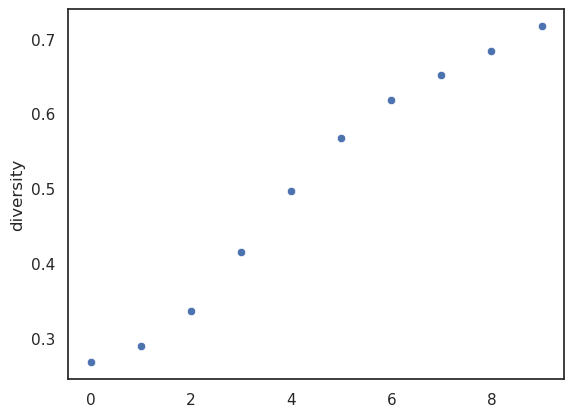

In [51]:
sns.scatterplot(y=div_bin_x/div_bin_aut, x=range(len(div_bin_x)))

In [52]:
div_bin_x, div_bin_aut

(0     17.688579
 1     31.233662
 2     44.959698
 3     63.664769
 4     85.152291
 5    107.228428
 6    128.234103
 7    148.743287
 8    175.248894
 9    227.524884
 Name: diversity, dtype: float64,
 0     66.098255
 1    107.992495
 2    133.727455
 3    153.709357
 4    171.738409
 5    189.113190
 6    207.636533
 7    228.442217
 8    256.213409
 9    317.249606
 Name: diversity, dtype: float64)

Per individual stats.

Flexible intervals:

In [ ]:
def interval_creator(bed_l, window_size):
    # Input a bed file and the window size of intervals desired. Multiple chromosomes accepted.
    df_l = []
    for c in bed_l.chrom.unique():
        print(c)
        start_l, end_l = [], []
        b = bed_l.loc[bed_l["chrom"] == c].copy()
        b["w_s"] = b.end-b.start
        w_start = b.start.iloc[0]
        current_size = 0
        for i, j, k in zip(b.start, b.end, b.w_s):
            # Current window encapsulates the final stretch of the interval.
            if current_size + k >= window_size:
                start_l.append(w_start), end_l.append(i+(window_size-current_size))
                w_start = i+(window_size-current_size)
                # If the window still contains full intervals, contigous windows until it cant.
                for x in range((k-window_size+current_size)//window_size):
                    start_l.append(w_start), end_l.append(w_start+window_size)
                    w_start += window_size
                current_size = j-w_start
            # Current window does not encapsulate per definition, so it has to be added to current size but nothing else.
            else:
                current_size += k
        df_l.append(pd.DataFrame({"chrom": c, "interval_start": start_l, "interval_end": end_l}))
    return pd.concat(df_l)

In [ ]:
interval_df = interval_creator(bed_files.loc[bed_files["chrom"].isin(large_contigs)], 10000)